# Candlestick Engulfing

https://www.investopedia.com/terms/b/bullishengulfingpattern.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Engulfing

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

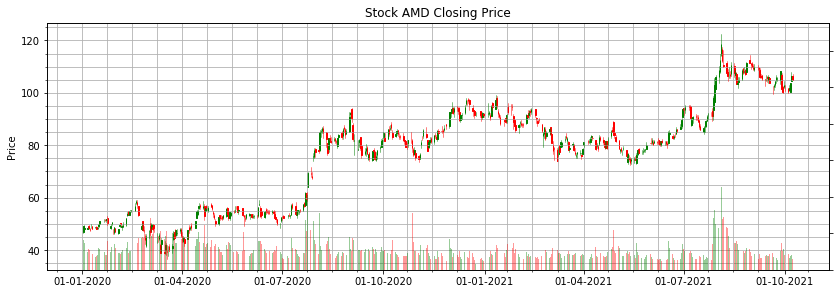

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
engulfing = talib.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])

engulfing  = engulfing[engulfing != 0]

In [6]:
df['engulfing'] = talib.CDLENGULFING(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['engulfing'] !=0]

,Open,High,Low,Close,Adj Close,Volume,engulfing
Date,,,,,,,
2020-01-10,49.259998,49.290001,48.000000,48.169998,48.169998,44133700,-100
2020-01-23,51.340000,51.750000,50.740002,51.709999,51.709999,40135400,100
2020-01-24,52.279999,52.810001,49.470001,50.349998,50.349998,80004900,-100
2020-01-30,46.490002,48.810001,46.130001,48.779999,48.779999,70460200,100
2020-02-25,51.139999,51.240002,47.119999,47.570000,47.570000,88699400,-100
2020-02-28,41.360001,46.150002,41.040001,45.480000,45.480000,100331800,100
2020-03-03,49.029999,50.200001,45.669998,46.750000,46.750000,141972300,-100
2020-03-11,44.189999,45.970001,43.799999,45.700001,45.700001,101601100,100
2020-03-31,47.930000,48.529999,45.160000,45.480000,45.480000,83483700,-100


In [8]:
df['Adj Close'].loc[df['engulfing'] !=0]

Date
2020-01-10     48.169998
2020-01-23     51.709999
2020-01-24     50.349998
2020-01-30     48.779999
2020-02-25     47.570000
2020-02-28     45.480000
2020-03-03     46.750000
2020-03-11     45.700001
2020-03-31     45.480000
2020-04-02     44.490002
2020-05-04     52.560001
2020-05-14     54.509998
2020-05-19     55.470001
2020-05-26     53.189999
2020-06-03     52.730000
2020-06-08     52.970001
2020-06-09     56.389999
2020-06-23     53.990002
2020-08-18     81.660004
2020-08-20     82.769997
2020-08-24     83.080002
2020-09-02     90.220001
2020-09-10     78.980003
2020-09-16     76.660004
2020-09-21     77.940002
2020-10-14     84.209999
2020-11-16     83.730003
2020-11-19     85.540001
2020-12-03     92.309998
2020-12-28     91.599998
2021-01-11     97.250000
2021-02-16     91.459999
2021-03-02     84.129997
2021-04-21     81.610001
2021-05-05     77.830002
2021-05-19     76.230003
2021-06-15     80.470001
2021-07-02     94.699997
2021-08-26    107.269997
2021-09-16    106.22

In [9]:
df['Adj Close'].loc[df['engulfing'] !=0].index

DatetimeIndex(['2020-01-10', '2020-01-23', '2020-01-24', '2020-01-30',
               '2020-02-25', '2020-02-28', '2020-03-03', '2020-03-11',
               '2020-03-31', '2020-04-02', '2020-05-04', '2020-05-14',
               '2020-05-19', '2020-05-26', '2020-06-03', '2020-06-08',
               '2020-06-09', '2020-06-23', '2020-08-18', '2020-08-20',
               '2020-08-24', '2020-09-02', '2020-09-10', '2020-09-16',
               '2020-09-21', '2020-10-14', '2020-11-16', '2020-11-19',
               '2020-12-03', '2020-12-28', '2021-01-11', '2021-02-16',
               '2021-03-02', '2021-04-21', '2021-05-05', '2021-05-19',
               '2021-06-15', '2021-07-02', '2021-08-26', '2021-09-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
engulfing

Date
2020-01-10   -100
2020-01-23    100
2020-01-24   -100
2020-01-30    100
2020-02-25   -100
2020-02-28    100
2020-03-03   -100
2020-03-11    100
2020-03-31   -100
2020-04-02    100
2020-05-04    100
2020-05-14    100
2020-05-19    100
2020-05-26   -100
2020-06-03   -100
2020-06-08   -100
2020-06-09    100
2020-06-23   -100
2020-08-18   -100
2020-08-20    100
2020-08-24   -100
2020-09-02   -100
2020-09-10   -100
2020-09-16   -100
2020-09-21    100
2020-10-14   -100
2020-11-16    100
2020-11-19    100
2020-12-03   -100
2020-12-28   -100
2021-01-11    100
2021-02-16   -100
2021-03-02   -100
2021-04-21    100
2021-05-05   -100
2021-05-19    100
2021-06-15   -100
2021-07-02    100
2021-08-26   -100
2021-09-16    100
dtype: int32

In [11]:
engulfing.index

DatetimeIndex(['2020-01-10', '2020-01-23', '2020-01-24', '2020-01-30',
               '2020-02-25', '2020-02-28', '2020-03-03', '2020-03-11',
               '2020-03-31', '2020-04-02', '2020-05-04', '2020-05-14',
               '2020-05-19', '2020-05-26', '2020-06-03', '2020-06-08',
               '2020-06-09', '2020-06-23', '2020-08-18', '2020-08-20',
               '2020-08-24', '2020-09-02', '2020-09-10', '2020-09-16',
               '2020-09-21', '2020-10-14', '2020-11-16', '2020-11-19',
               '2020-12-03', '2020-12-28', '2021-01-11', '2021-02-16',
               '2021-03-02', '2021-04-21', '2021-05-05', '2021-05-19',
               '2021-06-15', '2021-07-02', '2021-08-26', '2021-09-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,engulfing
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0
2021-10-06,100.449997,103.720001,100.349998,103.639999,103.639999,39071700,0


Text(0, 0.5, 'Price')

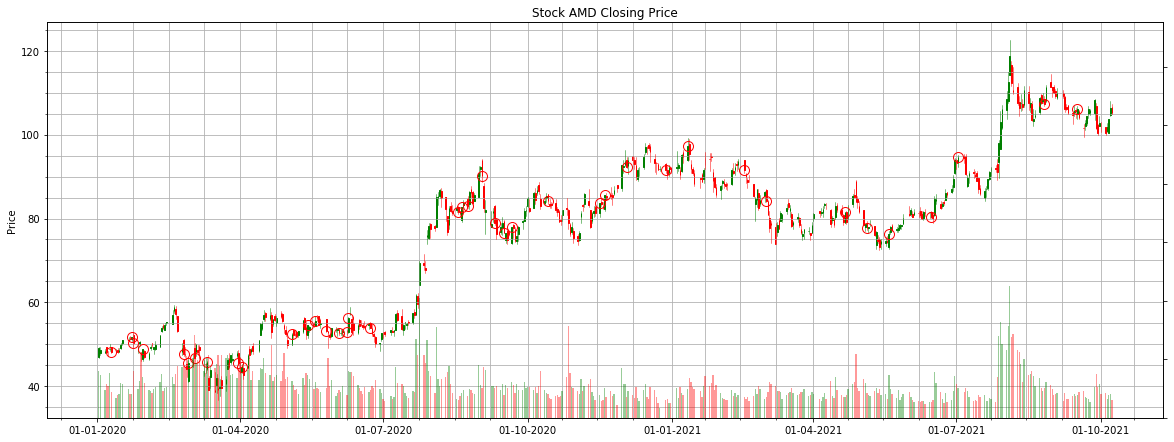

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['engulfing'] !=0].index, df['Adj Close'].loc[df['engulfing'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-08-01':'2021-10-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,engulfing,VolumePositive
0,738004.0,105.930000,110.330002,103.830002,108.629997,108.629997,115581900,0,True
1,738005.0,108.150002,114.849998,107.660004,112.559998,112.559998,157723100,0,True
2,738006.0,114.360001,122.489998,114.160004,118.769997,118.769997,225368700,0,True
3,738007.0,116.629997,117.680000,111.589996,112.349998,112.349998,137860900,0,False
4,738008.0,110.550003,116.260002,109.699997,110.110001,110.110001,143792800,0,False


Text(0, 0.5, 'Price')

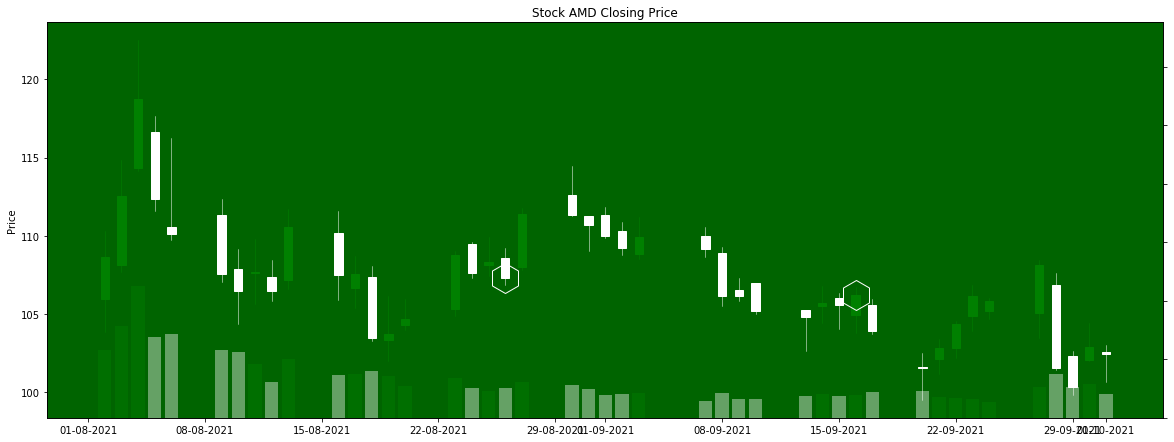

In [17]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('darkgreen')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='w', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['engulfing'] !=0].index, df['Adj Close'].loc[df['engulfing'] !=0],
                'hw', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'w'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

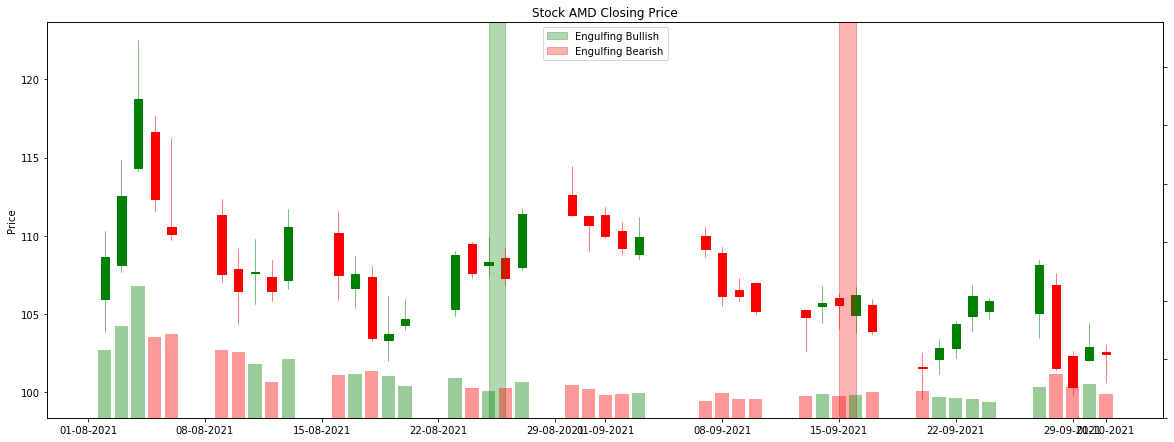

In [19]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,8,25)), date2num(datetime(2021,8,26)), 
           label="Engulfing Bullish",color="Green", alpha=0.3)
ax.axvspan(date2num(datetime(2021,9,15)), date2num(datetime(2021,9,16)), 
           label="Engulfing Bearish",color="Red", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')